## Topics

**Covered so far**:
- Loading a dataset
- Exploratory Data Analysis: checking quality of data, informal hypothesis testing
- Preprocessing: encoding categorical variables, standardizing numerical variables
- Training and testing sets
- Mathematical formulation of simple linear regression
- Training and evaluating linear polynomial regression- covering basis functions
- Training and evaluating multiple linear regression
- Bias-variance tradeoff

**To be covered**:
- Cross validation
- Regularization and penalty terms: L1, L2, elastic net
- Synthetic data generation over Gaussian distribution

In [149]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data
Choosing the dataset took the most time for me as I wanted something widely accessible (don't need to aggregate various sources), doesn't require a lot of preprocessing, is suitable for regression, and has something to do with "behavior" / cogsci since this is a CGS course anyway. 

I had decided on the popular Student Performance dataset by UC Irvine, (which can be downloaded from https://archive.ics.uci.edu/dataset/320/student+performance), before I realized most of its features are very categorical.

So instead I spent a few hours with the Wine Quality dataset, also by UC Irvine, which has significantly more rows, a third of the features, and intended for practicing regression/classification. It was only when I reached modeling did I realize that this dataset lacks very strongly correlated features, so getting a nice single-variable polynomial regression plot was not feasible. 

I finally decided on the wine dataset provided by my STAT 4360 professor, which I've uploaded to this GitHub.

Exercise 1: Download the dataset and place it in your working directory. Change the `path` variable to point to the CSV file.

Exercise 2: Briefly look up what a dataframe is and why it's so useful in data science. If you have some time on your hands, read the chapter by the author of Pandas: https://wesmckinney.com/book/pandas-basics#pandas_dataframe

In [150]:
# Define file paths
#path = "dataset/wine-expanded.csv"
path = "dataset/wine.txt"

# Load the dataset into Pandas dataframe
df = pd.read_csv(path, delim_whitespace=True) # whitespace delimeter

print(df.shape)
df

(38, 7)


/tmp/ipykernel_2425448/2370373009.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True) # whitespace delimeter


,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
0,1.0,3.3,2.8,3.1,4.1,9.8,1
1,1.0,4.4,4.9,3.5,3.9,12.6,1
2,1.0,3.9,5.3,4.8,4.7,11.9,1
3,1.0,3.9,2.6,3.1,3.6,11.1,1
4,1.0,5.6,5.1,5.5,5.1,13.3,1
5,1.0,4.6,4.7,5.0,4.1,12.8,1
6,1.0,4.8,4.8,4.8,3.3,12.8,1
7,1.0,5.3,4.5,4.3,5.2,12.0,1
8,1.0,4.3,4.3,3.9,2.9,13.6,3
9,1.0,4.3,3.9,4.7,3.9,13.9,1


Exercise 3: Try running the above line without the delimeter arg and see what happens. Predict the raw structure of the CSV file. Open the file- were you right?

### Exploratory Data Analysis (EDA)
If you choose the dataset, you usually read the paper / description about it. However, in practice there aren't detailed descriptions of the data your company tells you do train an ML model on. All you get is the goal. This is where EDA comes in. The goal is to understand the important ideas and relationships of the dataset to form hypotheses.

Further reading: Mukhiya and Ahmed's "Hands-On Exploratory Data Analysis with Python" (free, use O'Reilly)

In [151]:
# The describe() function provides the 5-number summary, as well as std, mean, and count.
df.describe()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.923684,4.847368,4.684211,4.768421,4.255263,12.436842,1.868421
std,0.123975,1.082474,0.824138,1.028014,0.738039,2.045353,0.875216
min,0.500000,3.300000,2.600000,2.900000,2.900000,7.900000,1.000000
25%,0.825000,4.125000,4.150000,4.225000,3.700000,11.150000,1.000000
50%,1.000000,4.650000,4.750000,4.800000,4.100000,12.450000,2.000000
75%,1.000000,5.450000,5.375000,5.500000,4.775000,13.750000,3.000000
max,1.000000,7.700000,6.600000,7.000000,6.000000,16.100000,3.000000


In [152]:
# See the dataset's metadata, particularly the datatypes and "nullity" of every column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Clarity   38 non-null     float64
 1   Aroma     38 non-null     float64
 2   Body      38 non-null     float64
 3   Flavor    38 non-null     float64
 4   Oakiness  38 non-null     float64
 5   Quality   38 non-null     float64
 6   Region    38 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.2 KB


In [153]:
# Since there are only 7 columns, we can see with a glance if any rows are empty. However, if there were more, we could use:
df.isnull().values.any()

np.False_

We can see that every row of every the column is non-null: this is a very clean dataset! If there were missing entries, we would have to remove them or synthetically approximate them with a median or average.

Exercise 4: Guess or look up how to retrieve all the columns of a dataframe. Then take a moment to consider the formatting of the variables. For example, the `region` variable is categorical, but its classes are integers, not strings. This means we don't need to translate from strings to integers, but *we will still need to encode*.

Of these 7 columns, there are 6 corresponding to **predictor** variables, also called **features** or **covariates**, which are variables that may (or may not) affect the **output** variables, also called **responses** or **target** variables. There is only one output variable: `Quality` of the wine. 


### Plots and Hypothesis Testing
A part of EDA, we will explore a few informal hypotheses to get a better understanding of the dataset.

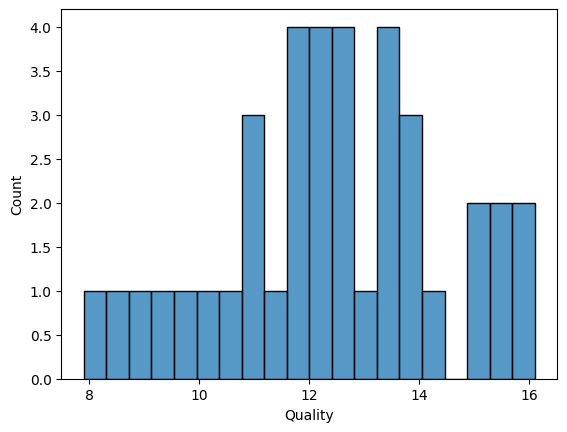

In [154]:
# First, getting a rough idea of the distribution of the target variable.
sns.histplot(df['Quality'], bins=20)
plt.show()
# This isn't necessary, but good to have in mind.

We see the quality roughly follows a right-skewed bell curve.

Now for a hypothesis: I might suspect that higher the flavor, the higher the quality.

Exercise 5: Think about the relationships between predictors and the target. Write your own hypothesis about the relationship between a predictor and the target. 

Let's test our hypotheses now.

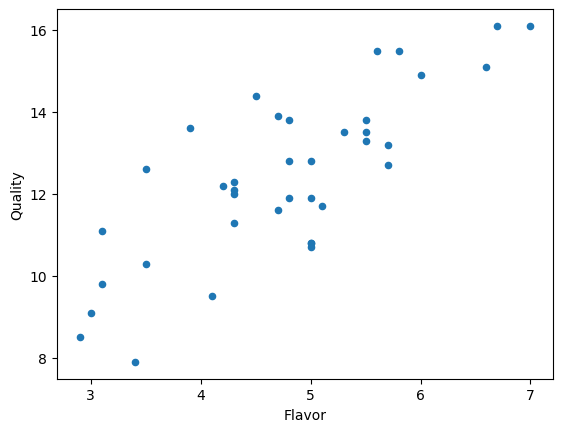

In [155]:
# Plotting categorical features vs Target: box plots are good
df.plot.scatter(x = 'Flavor', y = 'Quality')
plt.show()

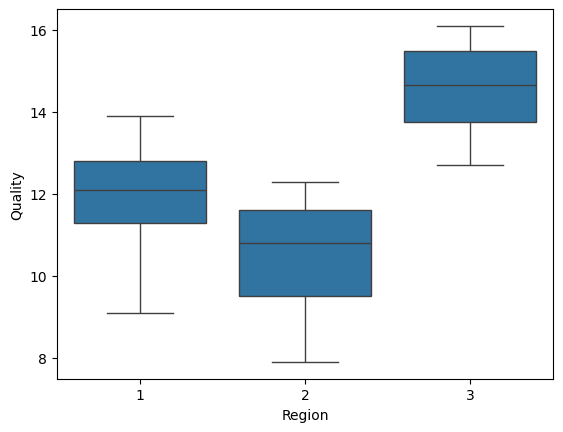

In [156]:
# Plotting categorical features vs target: box plots are good
sns.boxplot(data=df,x='Region',y='Quality')
plt.show()

There is a large positive correlation! Looks like my hypothesis was correct. How about yours? Also, the boxplot above reveals that Region 3 tends to produce better quality wine.

Exercise 6: Use the appropriate Seaborn function to plot your chosen predictor against Quality. Try to use a different function than mine. See https://seaborn.pydata.org/api.html for ideas.

Note that our hypothesis testing is informal. Formal hypothesis testing is useful (with p-values and whatnot), but this data is simple enough that graphs suffice to get an idea of whether we are right or wrong. 

### Preprocessing

Since we have already found our dataset to be clean, the two remaining parts of preprocessing are encoding categorical data and standardizing or normalizing numerical data.

In [163]:
# Every column except quality is a predictor- whether all of these are actually relevant remains to be answered.
X = df.drop(columns='Quality')

# Our response variable is quality.
y = df['Quality']

X[8:13] # look: 3, 1, 3, 2, 3

,Clarity,Aroma,Body,Flavor,Oakiness,Region
8,1.0,4.3,4.3,3.9,2.9,3
9,1.0,4.3,3.9,4.7,3.9,1
10,1.0,5.1,4.3,4.5,3.6,3
11,0.5,3.3,5.4,4.3,3.6,2
12,0.8,5.9,5.7,7.0,4.1,3


#### Categorical Encoding and Normalization

ML models (anything not specifically NLP) don't accept strings. In the UC Irvine Student Performance dataset, a number of variables were categorical strings. Let's try encoding them, as Dr. Golden mentioned in lecture 2.
There are two kinds of categorical data: ordinal (inherently ordered) and nominal (not inherently ordered).

For example, `reason` (in the UC Irvine Student Performance dataset) is a nominal variable. For this there are a number of encoding methods, the most popular of which is one-hot encoding.

I'll import the UC Irvine dataset just to demonstrate this, even if we're using a different dataset.

Exercise 7: Look into different types of categorical variable encodings.

In [158]:
df_uci = pd.read_csv('student_dataset/student-mat.csv', delimiter=';')
X_uci = df_uci.drop(columns=['G1','G2','G3'])
y_uci = df_uci['G3']
X_uci.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [159]:
# Recall from exercise 4 that the datatype of the color feature is categorical integers.
# The datatype of the reason variable is categorical strings.  
# If we wanted to know how many unique categories it had, we could do:
pd.unique(X_uci['reason'])

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [160]:
# We break up our dataset into categorical and numerical data.
cate = X_uci.select_dtypes(include=['object'])
nume = X_uci.select_dtypes(exclude=['object']) # or X.drop(categorical.columns,axis=1)

# Next we need to encode the categorical data.

In [161]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# OneHotEncoder is a transformer, which are scikit-learn classes that implement the fit() and transform() methods.
# This transformer specific transform function takes in an array-like (including dataframes) and returns a binary array.

cate_encoder = OneHotEncoder(sparse_output=False, drop='first')
cate_encoder.fit(cate) # determines categories of each feature

cate_encoded = cate_encoder.transform(cate) # this is a simple dense array, not a dataframe anymore.

# StandardScaler is also a transformer, which subtracts the mean and divides by the standard deviance.
# This is important for regularization, which we'll talk about soon.
nume_scaler = StandardScaler()
nume_scaler.fit(nume)

nume_scaled = nume_scaler.transform(nume)

X_encoded = np.hstack([nume_scaled, cate_encoded])

There are more advanced methods which are more maintainble and reproducible. It involves defining a `Pipeline`, and making one stage the `ColumnTransformer` which takes in transformers applies them in sequence / on specified dataframes. This abstracts away many steps, so not a great learning tool.

Now we'll encode and standardize the wine dataset.

You might notice that the `Region` variable is already just integers- why do we need to encode it? It's because the way things are now, Region 3 is treated three times as "large" as Region 1- we need to explicitly encode it as categorical. If cherry picking features, there are ways to automatically tell the model to treat a variable as categorical (in statsmodels, it's done by writing C(Region)). We're learning the more general case.

In [165]:
cate = X[['Region']]
nume = X.drop(columns='Region')

scaler = StandardScaler()
scaler.fit(nume)
scaled = scaler.transform(nume)

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(cate)

# In the previous example we stacked as NumPy arrays- this time I want to keep the column names, so I'm wrapping back into a DataFrame.

scaled_df = pd.DataFrame(scaled, columns=nume.columns, index=nume.index)
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Region']), index=cate.index)

X_encoded = pd.concat([scaled_df, encoded_df], axis=1)
X_encoded[8:13] # 001, 100, 001, 010, 001: just like before

,Clarity,Aroma,Body,Flavor,Oakiness,Region_1,Region_2,Region_3
8,0.623836,-0.512452,-0.472455,-0.856095,-1.860953,0.0,0.0,1.0
9,0.623836,-0.512452,-0.964326,-0.067450,-0.487823,1.0,0.0,0.0
10,0.623836,0.236516,-0.472455,-0.264611,-0.899762,0.0,0.0,1.0
11,-3.463367,-1.448663,0.880190,-0.461773,-0.899762,0.0,1.0,0.0
12,-1.011045,0.985485,1.249093,2.199905,-0.213197,0.0,0.0,1.0


## The Model
We will train and test two regression models: ordinary linear regression and ridge regression.

### Simple Linear Regression

Also known as ordinary or single-variable linear regression, it involves choosing one predictor and modeling it against the target.

I am assuming you are already familiar with the standard single-variable $y=ax+b$ model from CS 3341 or similar. This section reviews its mathematical formalism

The goal is to approximate the linear relationship 
$$
Y=f(x)+\epsilon
$$
by computing
$$
\hat Y=\hat \beta_0+\hat\beta_1x
$$
where $\beta_0$ is the intercept: $E(Y\mid X=0)$
and $\beta_1$ is the slope.



The goal is to estimate the regression coefficients that provide the regression line close as possible to the observed data. The most common method to accomplish this is using the method of **ordinary least squares** (OLS), which is, estimating the regression coefficients by minimizing the **sum of squares of residuals**:
$$
\sum^n_{i=1}(Y_i-\hat Y_i)^2
$$

Letting $\beta=[\beta_0,\beta_1]^T$ and $\hat Y=\mathbf X\beta$, we can write the above expression in matrix notation
$$
(\mathbf Y-\mathbf X\beta)^T(\mathbf Y-\mathbf X\beta)
$$
which can expanded using linear algebra, then minimized (set to zero and take the partial derivative) to find a closed-form solution that is the best-fit line (assuming $X^TX$ is invertible).

Exercise 8: Verify that the solution is $\hat\beta=(\mathbf X^T\mathbf X)^{-1}\mathbf X^T\mathbf Y$. If you work forward from the above steps, this should be straightforward. If you work backward, you'll need to pull out some more tools from linear algebra (orthogonal projection matrix, span)

This closed-form solution is what scikit-learn is running in the background to "train" the `LinearRegression` we import as a black box below. I say "train" because there's no repeated improvement to fit the parameters here; this is not gradient descent. There is just matrix multiplication.

### (Linear) Polynomial Regression
Here we maintain the relationship between a still single variable and the target, but instead of the traditional line, we project the one-dimensional x values into a higher dimension. 
$$
y=a_0+a_1x+a_2x^2+a_3x^3+\dotsb
$$

Of course, simple linear regression is the degree-1 special case of polynomial regression.


This is still a linear model! It is one of the models called a Generalized Linear Model (GLM). Other GLMs include Logistic regression and Hurdle models.

P.S. I believe Dr. Golden talks about a "basis function" at some point. What we are doing here is using a polynomial basis: {1, x, x^2, x^3...}. If you recall the definition of a basis from linear algebra, this is also called a basis of the polynomial vector space.

For degree 1, Train MSE: 1.5882054032894555, Test MSE: 1.0641493429567475


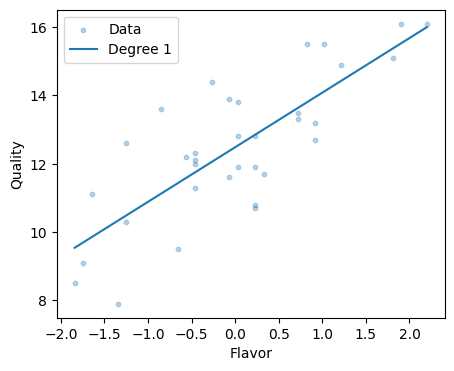

For degree 2, Train MSE: 1.5878927745894629, Test MSE: 1.0526327873227257


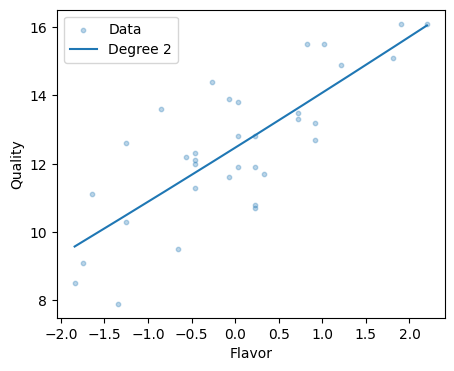

For degree 3, Train MSE: 1.5409476560845847, Test MSE: 1.0567088848274255


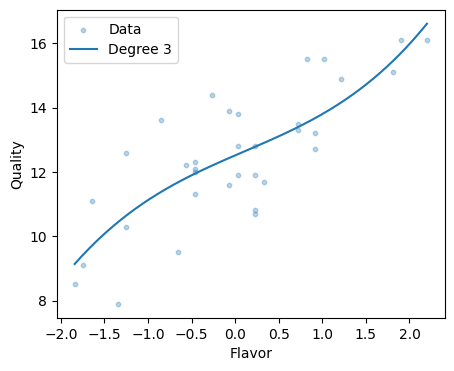

For degree 5, Train MSE: 1.4705278851725498, Test MSE: 0.8964210787971306


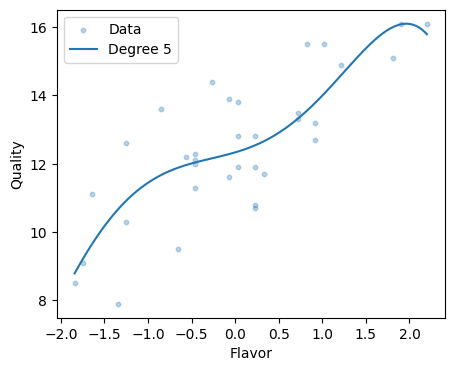

For degree 10, Train MSE: 1.289724017640284, Test MSE: 1.104714196447079


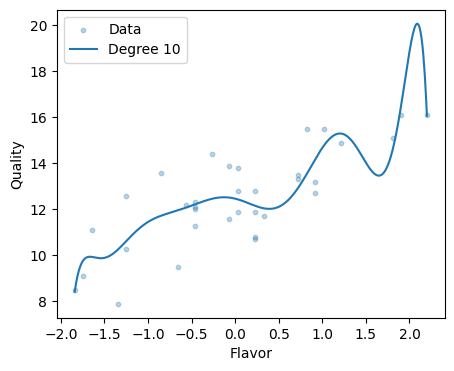

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_single = X_encoded[['Flavor']].values # Get a NumPy version of the column of the dataframe

# Splitting our dataset into training and testing subsets (here we divide into a 90-10 ratio) allows us to check our data's performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(X_single, y.values, test_size=0.1, random_state=38)

# Selection of degrees from 1 to 10
degrees = [x for x in range (1, 11)]

train_MSEs, test_MSEs = [], []

# A smooth range of values between the minimum and maximum
X_range = np.linspace(X_single.min(), X_single.max(), 500).reshape(-1, 1)

for d in degrees:

    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train) # generates polynomial combinations of the features with degree <= d
    X_test_poly = poly.transform(X_test)
    
    # Fit the model on the training dataset
    model = LinearRegression().fit(X_train_poly, y_train)
    
    # Compute the training mean squared error (MSE) by predicting on the train dataset
    pred_train = model.predict(X_train_poly)
    train_MSE = mean_squared_error(y_train, pred_train)
    train_MSEs.append(train_MSE)
    
    # Compute the test MSE by predicting on the test dataset
    pred_test = model.predict(X_test_poly)
    test_MSE = mean_squared_error(y_test, pred_test)
    test_MSEs.append(test_MSE)

    # Look into the LinearRegression().score method- how does it differ?

    if ((d < 4) or (d % 5 == 0)): # Show a lot of the earlier values, sparsely the later ones
        X_range_poly = poly.transform(X_range)

        # Procure a curve by predicting on a range of smooth values
        pred_range = model.predict(X_range_poly)

        print(f"For degree {d}, Train MSE: {train_MSE}, Test MSE: {test_MSE}")

        fig, ax = plt.subplots(figsize=(5, 4))
        ax.scatter(X_train, y_train, s=10, alpha=0.3, label="Data")
        ax.plot(X_range, pred_range, label=f"Degree {d}")
        ax.set_xlabel("Flavor")   # or "Flavor" if you renamed
        ax.set_ylabel("Quality")
        ax.legend()
        plt.show()

This is the core point I wanted to illustrate: testing MSE vs training MSE, overfitting vs underfitting, flexibility vs interpretability, and Bias vs Variance.

Concepts
- Overfitting: When your model gets "overattached" to the training data, and won't generalize well to unseen data.
- Underfitting: When your model hates the training data's guts (and probably won't agree with unseen data any better).
- Model flexibility: The ability of the model to generalize to new patterns: a quadratic regression model can model many more situations than a simple line- a cubic many more than a quadratic, and so on. 
- Model interpretability: While in a quadratic model it is easy to see how each variable contributes, it is hard for polynomials of higher degree. 

Relations: "The training MSE is a decreasing function of model flexibility, while the test MSE is a U-shaped function of model flexibility." is how it is put in Introduction to Statistical Learning. Overfitting implies small training MSE but large test MSE. A less flexible model implies a smaller test MSE.

There are many different variations of the definitions of bias and variance. The simplest I've found are:

**Bias**: $E(\hat Y)-Y$, how far your average is from the truth. It can be thought of as the error introduced by approximating a real problem by a simplified model (which is every model in practice).

**Variance**: $E[Y-E(\hat Y)]^2$, how much fluctuation you have around the average. It can be thought of as the amount by which $\hat Y$ would change if estimated using a different data set.

The test MSE $E[(Y-\hat Y)^2]$ can be written as $\text{Bias}^2+\text{Variance}$. The proof is fairly short and involves some simple algebraic tricks and some rules of expectations. It's a hassle of notation though :).

Exercise 9: If not wishing to prove yourself, read the proof once or twice. It's in every rigorous ML text: Murphy's PML's and Bishop's PRML provide succinct proofs, Andrew Ng's CS229 Course Notes and Chan's Intro to Probability for Data Science explain it in more detail. These are all free PDFs.

Notice how we stored the train and test errors in an array. We can now graph them.

In [184]:
print(test_MSEs)

[0.98740768964522, 1.14413242398689, 0.9973708038573401, 0.8917097826028861, 0.9162114082588542, 1.5762951871790976, 1.1569079976712453, 1.082661666838405, 1.1231553409587312, 1.8782916826914677]


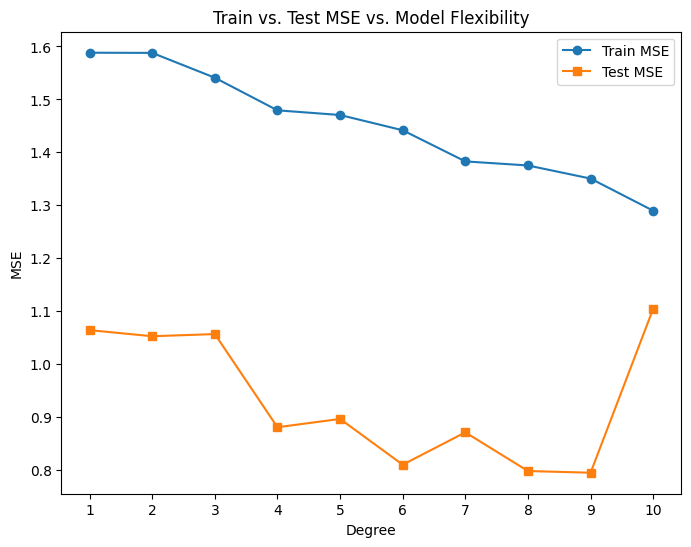

In [192]:
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_MSEs, marker='o', label='Train MSE')
plt.plot(degrees, test_MSEs, marker='s', label='Test MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Train vs. Test MSE vs. Model Flexibility')
plt.xticks(degrees)
plt.legend()
plt.show()

Train MSE trends downward, while test MSE follows (roughly) a U-shape.

### Multiple Linear Regression
We now touch on an additional source of concern for the bias-variance tradeoff: flexibility is not just in degree, but also in number of features.

The prediction formula is
$$
\hat y = \hat\beta_0+\hat\beta_1x_1+\hat\beta_2x_2+\dotsb+\hat\beta_px_p
$$

The closed-form may still be obtained from least squares but it is complicated.

It is possible that all predictors are associated with the target, but it's more likely than only a subset of the predictors are. **Feature selection** is the process of selecting this subset. 

Exercise 10: Why is it not computationally feasible to check every subset of the feature vector? Write an expression for the number of subsets.

There are several methods that approximate the best-performing (most relevant) subset of features. The one we will use is forward selection: we start with no variables, then add each one sequentially. The typical forward selection in practice also involves keeping the most relevant variables, but for learning purposes, we'll just keep all of them.

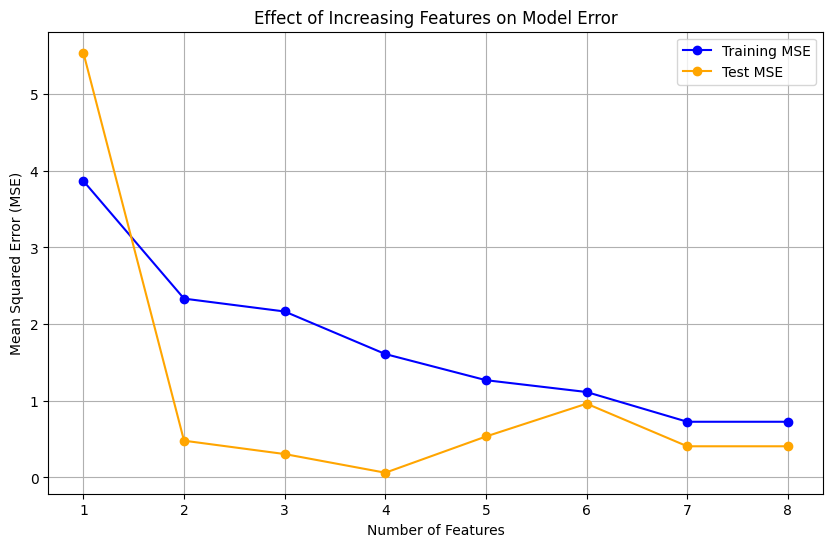

In [225]:
train_MSEs, test_MSEs = [], []
cols = X_encoded.columns.to_list()

# Add one feature at a time
for i in range(1, len(cols) + 1):
    # Select the first 'i' features from the list
    X_subset = X_encoded[cols[:i]]
    
    # Perform a new train-test split for each feature subset
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.15, random_state=45)
    
    # Fit a linear regression model
    model = LinearRegression().fit(X_train, y_train)
    
    # Calculate and store training MSE
    train_pred = model.predict(X_train)
    train_MSEs.append(mean_squared_error(y_train, train_pred))
    
    # Calculate and store test MSE
    test_pred = model.predict(X_test)
    test_MSEs.append(mean_squared_error(y_test, test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cols) + 1), train_MSEs, 'o-', label='Training MSE', color='blue')
plt.plot(range(1, len(cols) + 1), test_MSEs, 'o-', label='Test MSE', color='orange')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Increasing Features on Model Error')
plt.legend()
plt.grid(True)
plt.show()


Turns out that most of the features are highly relevant; except perhaps features 5 and 6, the adding of which increases the test MSE slightly.